# Looking at PCA and Gaussian permutation tests

In [1]:
%pylab inline
import numpy as np
import sklearn.cluster as cl
from sklearn import metrics
from sklearn import mixture
from scipy import ndimage
from sklearn.decomposition import PCA
import scipy.stats as stats




Populating the interactive namespace from numpy and matplotlib


In [2]:
params = np.loadtxt('quadratic_fit_parameters.txt')
name, W, DM = np.loadtxt("FRBs.txt", comments="#", unpack=True, usecols = [0,1,2])




In [3]:
N = np.arange(0, 100, 5)




In [4]:
def quad(x, a, b, c):
    return (a*x*x + b * x + c)




In [5]:
def norm_data(N,SC):
    pop_A = quad(np.linspace(2,10,N), params[0],params[1],params[2])
    pop_B = quad(np.linspace(1,5,N), params[3],params[4],params[5])
    scatter_A = pop_A + SC*np.random.randn(len(pop_A))
    scatter_B = pop_B + SC*np.random.randn(len(pop_B))
    
    total_DM = np.append(scatter_A, scatter_B)
    total_DM = np.append(total_DM, DM)
    
    total_W = np.append(np.linspace(2,10,N), np.linspace(1,5,N))
    total_W = np.append(total_W, W)
    
    y_mean = np.mean(total_DM)
    x_mean = np.mean(total_W)
    y_diff = total_DM - y_mean
    x_diff = total_W - x_mean
    y_norm = y_diff/np.std(total_DM,ddof=1)
    x_norm = x_diff/np.std(total_W,ddof=1)
    X_norm = np.array(zip(x_norm,y_norm))
    
    return X_norm



In [6]:
def K_mean(X):
    est = cl.KMeans(2, init='random',n_init=10 )
    est.fit(X)
    centers = est.cluster_centers_
    inertia = est.inertia_
    #print centers,'\n\n',inertia
    y_kmeans = est.fit_predict(X)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap='autumn_r', s=40);
    print y_kmeans
    plt.plot(centers[:,0],centers[:,1],'bx',ms=10,mew=2,label='Centroids');
    plt.xlabel('Width [ms]',fontsize=15)
    plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15)
    plt.legend(numpoints=1)
    plt.title('Number of FRBs:  %s'%len(X))
    return y_kmeans




In [7]:
def Hierarchical(X):
    est_HC = cl.AgglomerativeClustering(n_clusters = 2)
    est_HC.fit(X)
    y_HC = est_HC.fit_predict(X)
    #print y_HC
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y_HC, s=50,cmap='autumn_r')
    plt.title('Number of FRBs:  %s'%len(X), fontsize = 30)
    return 





In [8]:
def DBScan(X):
    est_DB = cl.DBSCAN()#eps=150,min_samples=50)
    est_DB.fit(X)
    y_DB = est_DB.fit_predict(X)
    print y_DB
    
    #Clusters
    labels= est_DB.labels_
    print labels
    n_clusters = len(set(labels))-(1 if -1 in labels else 0)   #-1 indicate outliers/noise
    #print labels,'\n','# Clusters = ',n_clusters

    #Silhouette Coefficient (1 => good, -1 => bad, 0 => overlapping clusters)
    #print 'Silhouette Coefficient: ',metrics.silhouette_score(X,labels)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y_DB, cmap='autumn_r',s=50);
    #plt.imshow(y_DB)
    plt.xlabel('Width [ms]',fontsize=15);
    plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15)
    plt.title('Number of FRBs:  %s, Number of clusters:  %s'%(len(X), n_clusters))
    return




In [9]:
def DPGMM(X):
    dpgmm = mixture.DPGMM(n_components=5)#, covariance_type='full')
    dpgmm.fit(X)
    #print y_HC
    y_DPGMM = dpgmm.predict(X)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y_DPGMM, cmap='autumn_r',s=50)
    plt.title('Number of FRBs:  %s'%len(X), fontsize = 30)
    return 




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

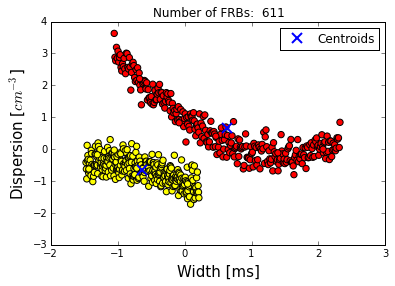

In [10]:
#for i in range(0,len(N)):
#    K_mean(norm_data(N[i],100))
X=norm_data(60*5,100)
labels = K_mean(X)




(0.0, 0.33333333333333331)


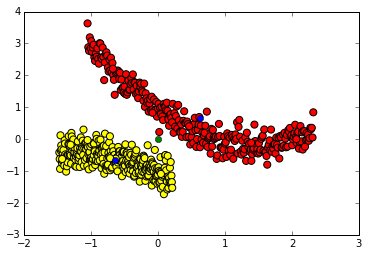

1.84135137592
[[ 0.70414787 -0.71005336]
 [ 0.71005336  0.70414787]] [[ 0.83321653 -0.55294684]
 [ 0.55294684  0.83321653]]


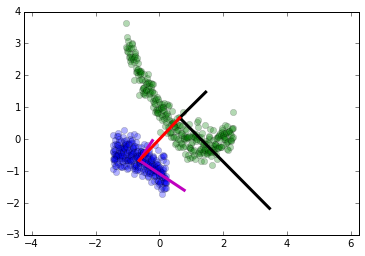

In [11]:
Y = np.array(([ -1.02302828e+00 ,  2.48787382e+00],
 [ -9.66751549e-01  , 3.17404395e+00],
 [ -9.10474818e-01  , 2.61323032e+00],
 [ -8.54198086e-01  , 2.47776292e+00],
 [ -7.97921355e-01  , 2.64297232e+00],
 [ -7.41644623e-01  , 2.50704525e+00],
 [ -6.85367892e-01  , 2.09829994e+00],
 [ -6.29091161e-01  , 2.64486777e+00],
 [ -5.72814429e-01  , 2.00890057e+00],
 [ -5.16537698e-01  , 2.17738244e+00],
 [ -4.60260966e-01  , 1.66169476e+00],
 [ -4.03984235e-01  , 1.69671332e+00],
 [ -3.47707503e-01  , 1.05146748e+00]))

#Z = np.array(zip(np.array(X[:,0]), np.array(X[:,1])))
Z = np.array(([2,1], [0,0]))
com = ndimage.measurements.center_of_mass(Z)
y = (Z[1][0], Z[1][1])
x = (Z[0][0], Z[0][1])
print com
#plt.plot(x,y, 'bo')
#plt.plot(com[0], com[1], 'go')
#plt.xlim(-1, 2)
#plt.ylim(-1,2)

#print np.array(X[:,0]), np.array(X[:,1])
#print zip(np.array(X[:,0]), np.array(X[:,1]))
x_work = np.array(X[:,0])*(1./len(X))
y_work = np.array(X[:,1])*(1./len(X))
x_sum = np.sum(x_work)
y_sum = np.sum(y_work)

wh_top = np.where(labels==0)
wh_bottom = np.where(labels==1)

xtop = X[:,0][wh_top]
ytop = X[:,1][wh_top]
x_tops = np.sum(xtop*(1./len(xtop)))
y_tops = np.sum(ytop*(1./len(ytop)))

xbot = X[:,0][wh_bottom]
ybot = X[:,1][wh_bottom]
x_bots = np.sum(xbot*(1./len(xbot)))
y_bots = np.sum(ybot*(1./len(ybot)))

plt.scatter(X[:,0],X[:,1],c= labels,cmap='autumn_r',s=50)
plt.plot(x_sum,y_sum,'go')
plt.plot(x_bots, y_bots,'bo')
plt.plot(x_tops, y_tops, 'bo')
plt.show()

separation = np.sqrt((x_bots-x_tops)**2+(y_bots-y_tops)**2)
print separation

pca = PCA(n_components=2)
A =X[wh_bottom]
B =X[wh_top]
pca.fit(A)
EVA= pca.explained_variance_
CA = pca.components_
pca.fit(B)
EVB= pca.explained_variance_
CB = pca.components_
plt.plot(A[:, 0], A[:, 1], 'og', alpha=0.3)
plt.plot(B[:, 0], B[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for length, vector in zip(EVA, CA):#pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([x_bots, v[0]+x_bots], [y_bots, v[1]+y_bots], '-k', lw=3)
    
for length, vector in zip(EVB, CB):#zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([x_tops, v[0]+x_tops], [y_tops, v[1]+y_tops], '-m', lw=3)
#print labels
#print np.array(X)
PCA_WIDTHS = EVA[1]+EVB[1]
plt.plot((x_tops, x_bots), (y_tops, y_bots), 'r', lw = 3)
separation - PCA_WIDTHS
print CA, CB
#plt.savefig('PCA.pdf')




[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


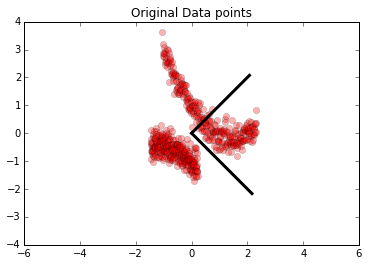

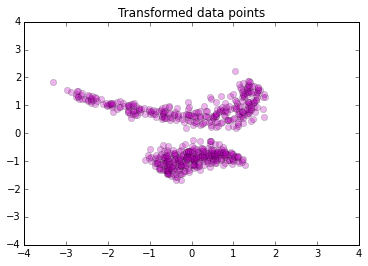

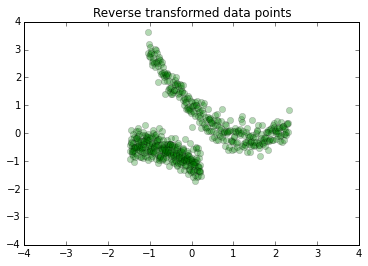

In [32]:
pca = PCA(n_components=2)
pca.fit(X)
EV= pca.explained_variance_
C = pca.components_
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.axis('equal')
for length, vector in zip(EV, C):#pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title('Original Data points')
    
#plt.savefig('20150821_PCA_bases.pdf')
print C
#print X
ys = np.dot(C, X.T)
trans_X = np.array(zip(ys[0],ys[1]))
plt.figure()
plt.plot(ys[0], ys[1], 'om', alpha=0.3)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('Transformed data points')
plt.savefig('20150821_PCA_bases_transformed.pdf')

zs = np.dot(C.T, ys)
plt.figure()
plt.plot(zs[0], zs[1], 'og', alpha=0.3)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('Reverse transformed data points')
#plt.savefig('20150821_PCA_bases_reversetran.pdf')



In [18]:
def Hierarchical(X):
    Ward_model = cl.AgglomerativeClustering(n_clusters = 2).fit(X)
    labels = Ward_model.labels_
    sil = metrics.silhouette_score(X,labels)
    return labels, sil

def Permutation_test(Xdata,nsims):    
    pca = PCA(n_components=2)
    pca.fit(Xdata)
    C = pca.components_
    ys = np.dot(C, Xdata.T)
    
    data = ys[1]
    other = ys[0]
    ndata_1 = len(data)
    #print 'data', np.shape(data)
    #print 'other', np.shape(other)
    
    fakeidx1=np.floor(random.rand(ndata_1,nsims)*ndata_1)
    fakeidx1 = fakeidx1.astype(int64)
    
    #print np.shape(fakeidx1)
    
    fake1=data[fakeidx1]
    
    #print 'fake', np.shape(fake1)
    other = np.array([other]*len(fake1.T))
    #print 'other', np.shape(other)
    
    new = np.array(zip(fake1.T, other))  
    #new = np.array([fake1.T, other])
    #print 'new', np.shape(new)
    #print 'new[0,:,:]', np.shape(new[1,:,:]), new[499,:,:], np.dot(C.T, new[499,:,:])
    new_trans = []
    for i in range(0,nsims):
        new_trans.append(np.dot(C.T, new[i,:,:]))
    #zs = np.array(zip(new_trans[0], new_trans[1]))
    #print np.shape(new_trans)
    return new_trans 



In [19]:
def p_value_H(sil, X):
    sil_K = np.zeros(len(X))
    for i in range(0,len(X)):
        permed = np.array(zip(X[i][0], X[i][1]))
        l, sil1 = Hierarchical(permed)
        sil_K[i] = sil1
    pval = (100. - stats.percentileofscore(sil_K,sil))/100.
    return pval

def dat_to_pval_H(N, SC, nsims):
    dat = norm_data(N,SC)
    labels, sil = Hierarchical(dat)
    X2 = Permutation_test(dat, nsims)
    pval = p_value_H(sil, X2)
    return pval

def beta(p):
    b = len(np.array(np.where(p < 0.05))[0])
    return (b+0.0)/len(p)



In [ ]:
N = [70]
big_ps_H = []
bet_H = np.zeros(len(N))
for j in range(0, len(N)):
    ps_sil = np.zeros(500)
    for i in range(0, 500):
        ps_sil[i] = dat_to_pval_H(N[j], 100, 500)
    bet_H[j] = beta(ps_sil)
    big_ps_H.append(ps_sil) 
    print bet_H



In [30]:
def Gaussian_Permutation_test(Xdata, nsims):    
    pca = PCA(n_components=2)
    pca.fit(Xdata)
    C = pca.components_
    ys = np.dot(C, Xdata.T)
    
    x = ys[0]
    y = ys[1]
    x_mean = np.mean(x)
    x_std = np.std(x, ddof =1)
    y_mean = np.mean(y)
    y_std = np.std(y, ddof =1)
    
    x_ran = np.random.normal(x_mean, x_std, (len(x),nsims))
    y_ran = np.random.normal(y_mean, y_std, (len(x), nsims))
    plt.figure()
    plt.plot(x_ran, y_ran,'o', alpha = 0.3, label = 'Random')
    plt.title('Randomly drawn from Gaussians')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.savefig('20150821_Nrandom.pdf')
    
    new = np.array(zip(x_ran,y_ran))

    new_trans = []
    for i in range(0,nsims):
        newer = np.dot(np.linalg.inv(C), new[:,:,i].T)
        new_trans.append(newer)
        plt.figure()
        plt.plot(newer[0], newer[1], 'go', alpha = 0.3, label = "Reverse Transform")
        plt.title('Reverse transformed for clustering')
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
    #plt.legend(numpoints = 1)
    #plt.ylim(-3, 4)
    plt.savefig('20150821_Nrandom_transform.pdf')
    return new_trans 





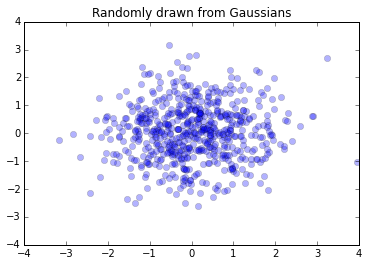

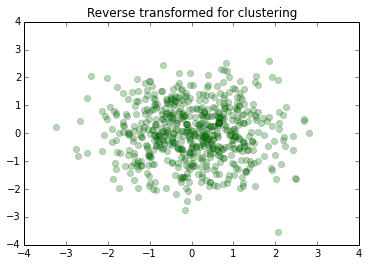

In [31]:
a = Gaussian_Permutation_test(X, 1)



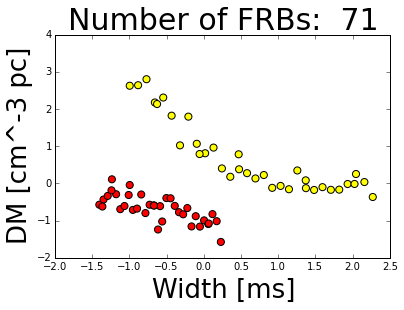

In [12]:
#for i in range(0,len(N)):
#    Hierarchical(norm_data(N[i],100))
plt.figure(figsize=(11,8))
Hierarchical(norm_data(30,100))
plt.xlabel('Width [ms]', fontsize = 26)
plt.ylabel('DM [cm^-3 pc]', fontsize = 26)
plt.savefig('70.pdf')

In [13]:
#for i in range(0,len(N)):
#    DBScan(norm_data(N[i],100))

#DBScan(norm_data(N[2],100))

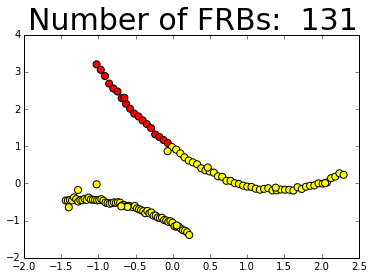

In [17]:
DPGMM(norm_data(60,10))